In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

survived = 'Survived'
not_survived = 'Not Survived'

fig = make_subplots(rows=1, cols=2, vertical_spacing=0.02,
                    specs=[[{"type": "histogram"}]*2],
                    subplot_titles=("Female", "Male"))

women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']

fig.add_trace(go.Histogram(x=women[women['Survived']==1].Age.dropna(), name=survived, nbinsx=18, showlegend=True, marker_color='blue'), row=1, col=1)
fig.add_trace(go.Histogram(x=women[women['Survived']==0].Age.dropna(), name=not_survived, nbinsx=40, showlegend=True, marker_color='red'), row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(go.Histogram(x=men[men['Survived']==1].Age.dropna(), name=survived, nbinsx=18, showlegend=False, marker_color='blue'), row=1, col=2)
fig.add_trace(go.Histogram(x=men[men['Survived']==0].Age.dropna(), name=not_survived, nbinsx=40, showlegend=False, marker_color='red'), row=1, col=2)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_layout(title='Histograms of Age by Survival and Sex',
                  barmode = 'overlay')
fig.update_traces(opacity=0.5)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.




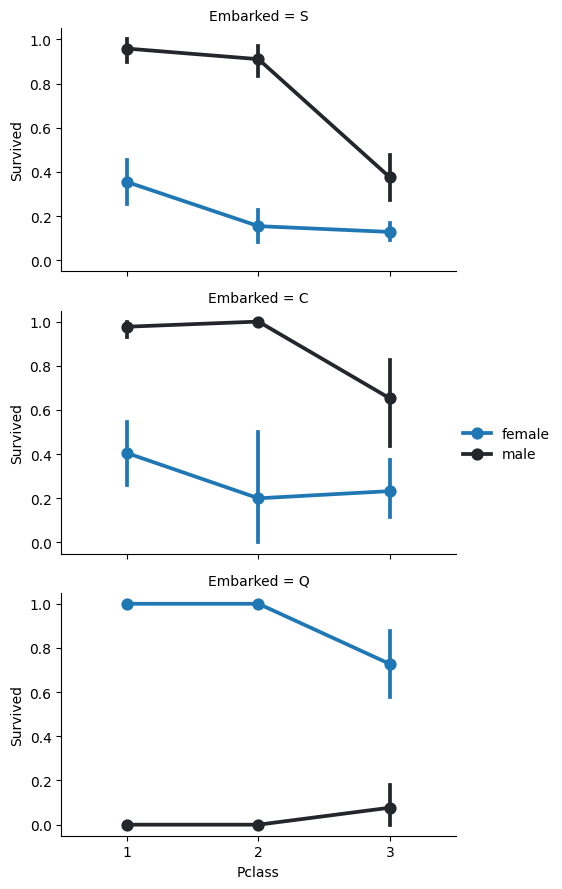

In [9]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [10]:
fig = go.Figure(data=[

    go.Bar(x=df_train['Pclass'], y=df_train['Survived'], marker=dict(color='blue'))

])


fig.update_layout(title='Barplot of Survived by Pclass',

                  xaxis_title='Pclass',

                  yaxis_title='Survived')


fig.show()

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, vertical_spacing=0.02,
                    specs=[[{"type": "histogram2dcontour"}]*2]*3
                    )

for i, pclass in enumerate(df_train['Pclass'].unique()):
    for j, survived in enumerate(df_train['Survived'].unique()):
        df_subset = df_train[(df_train['Pclass'] == pclass) & (df_train['Survived'] == survived)]
        fig.add_trace(go.Histogram(x=df_subset['Age'], name=f'Pclass={pclass}, Survived={survived}', opacity=0.5, nbinsx=20, ), row=i+1, col=j+1)

fig.update_layout(title='Histograms of Age by Pclass and Survived',
                  xaxis_title='Age',
                  yaxis_title='Count')

fig.show()

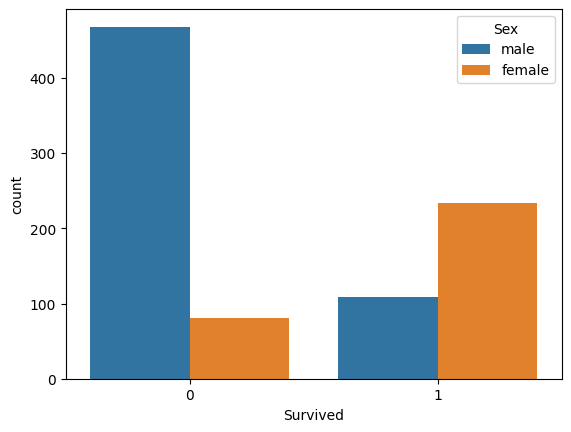

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.show()

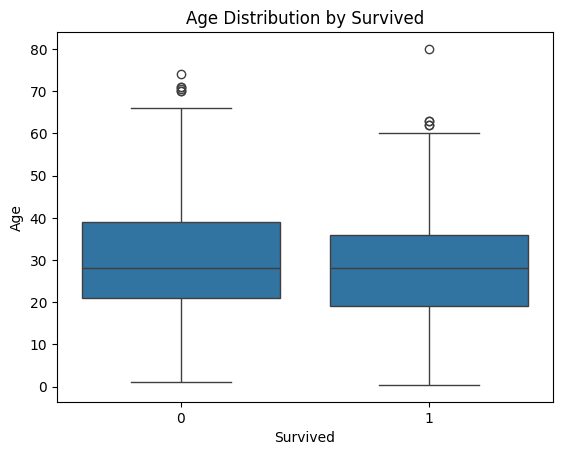

In [13]:
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age Distribution by Survived')
plt.show()

In [14]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


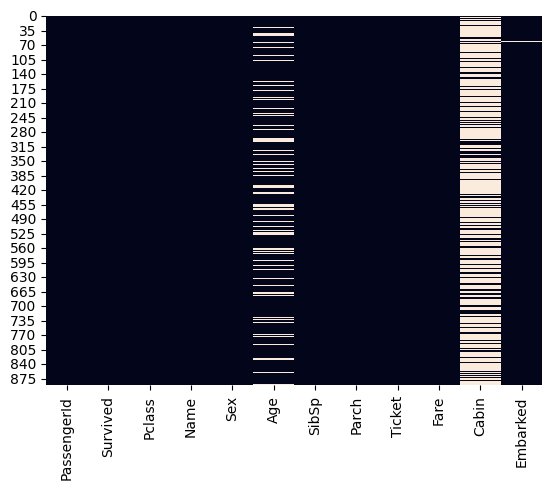

In [15]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [16]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [17]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [29]:
gender = {'male':0, 'female':1}
data = [df_train, df_test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [31]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [32]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [33]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [34]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7


In [36]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,8,1
5,0,3,0,3,0,0,8,2,8,1
6,0,1,0,6,0,0,51,0,5,1
7,0,3,0,0,3,1,21,0,8,4
8,1,3,1,3,0,2,11,0,8,3
9,1,2,1,1,1,0,30,1,8,3


In [37]:
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [38]:
data = [df_train, df_test]

for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [18]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,8


In [19]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,8
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,8
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,8
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,8
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,8
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,8
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,8
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,8


In [20]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)
    
df_train["Age"].isnull().sum()

0

In [21]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [24]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [25]:
data = [df_train, df_test]

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [26]:
correlation_matrix = df_train.corr(numeric_only=True)
print(correlation_matrix)

          Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived  1.000000 -0.338481 -0.066405 -0.035322  0.081629  0.257482   
Pclass   -0.338481  1.000000 -0.331807  0.083081  0.018443 -0.550553   
Age      -0.066405 -0.331807  1.000000 -0.216133 -0.168001  0.098922   
SibSp    -0.035322  0.083081 -0.216133  1.000000  0.414838  0.159506   
Parch     0.081629  0.018443 -0.168001  0.414838  1.000000  0.216252   
Fare      0.257482 -0.550553  0.098922  0.159506  0.216252  1.000000   
Deck     -0.289569  0.745453 -0.251230  0.043134 -0.029064 -0.523256   
Title     0.407753 -0.173929 -0.097587  0.269623  0.315784  0.136489   

              Deck     Title  
Survived -0.289569  0.407753  
Pclass    0.745453 -0.173929  
Age      -0.251230 -0.097587  
SibSp     0.043134  0.269623  
Parch    -0.029064  0.315784  
Fare     -0.523256  0.136489  
Deck      1.000000 -0.128043  
Title    -0.128043  1.000000  


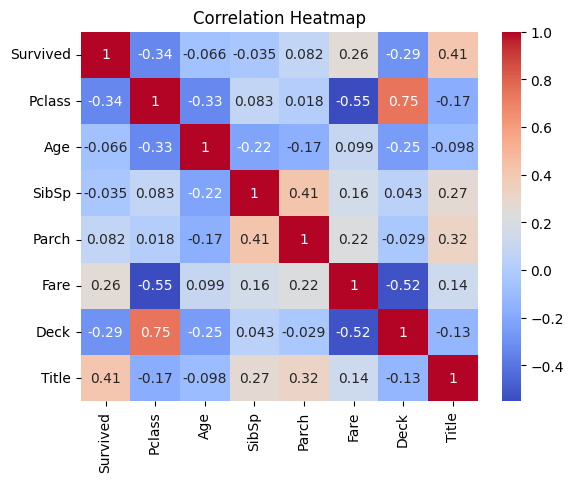

In [27]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_train['Title'].value_counts())

KeyError: 'Name'

In [ ]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_test['Title'].value_counts())

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_96593/3021830628.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
impute_value = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(impute_value)
df_test['Age'] = df_test['Age'].fillna(impute_value)

In [ ]:
df_train['IsFemale'] = (df_train['Sex'] == 'female').astype(int)
df_test['IsFemale'] = (df_test['Sex'] == 'female').astype(int)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [ ]:
correlation_matrix1 = df_train.corr(numeric_only=True)
print(correlation_matrix1)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
IsFemale       -0.042939  0.543351 -0.131900 -0.081163  0.114631  0.245489   

                 Fare  IsFemale  
PassengerId  0.012658 -0.042939  
Survived     0.257307  0.543351  
Pclass      -0.549500 -0.131900  
Age          0.096688 -0.081163  
SibSp        0.159651  0.114631  
Parch        0.216225  0.245489  
Fare         1.000000  0.182333  
IsFemale     0.182333  1.

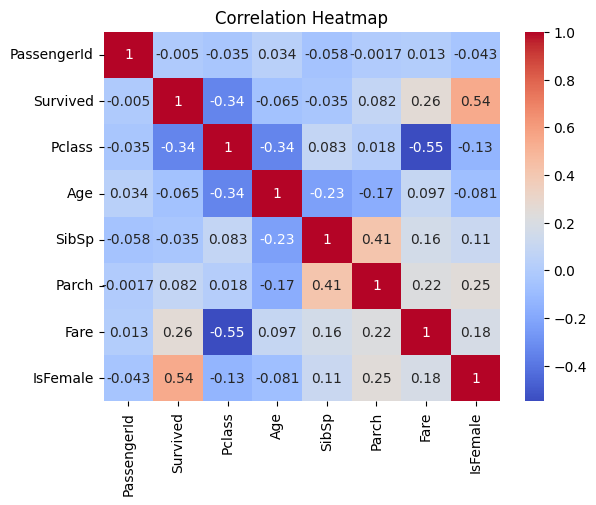

In [ ]:
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = df_train[predictors].values
X_test = df_test[predictors].values
y_train = df_train['Survived'].values
y_test = df_test['Survived'].values
X_train[:5]

KeyError: 'Survived'

In [ ]:
from sklearn.linear_model import LogisticRegression
logR_model = LogisticRegression()

In [ ]:
logR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = logR_model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.model_selection import cross_val_score
logR_model1 = LogisticRegression(C=10)
scores = cross_val_score(logR_model1, X_train, y_train, cv=4)
scores

array([0.77578475, 0.79820628, 0.77578475, 0.78828829])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y)
